In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import time
from astropy import units as u

# HW1

# Question 1:

### Integrator wrote in class:

In [2]:
def fun(x):
    return 1.0/(1.0+x**2)

def fun2(x):
    return 1.0+np.exp(-0.5*x**2/(sig**2))

def fun3(x):
    return np.exp(x)


def Integrator(fun,a,b,tol):
    
    #interval split into 4 ranges
    x=np.linspace(a,b,5)
    
    #get y values for the above x values
    y=fun(x)
    
    neval=len(x) #let's keep track of function evaluations
    
    #evaluate the integral using Simpson's rule.
    f1 = (y[0] + 4*y[2] + y[4]) / 6.* (b-a)
    f2 = (y[0] + 4*y[1] + 2*y[2] + 4*y[3]+y[4]) / 12.*(b-a)
    
    #error:
    myerr=np.abs(f2 - f1)
    
    #if error small enough
    if (myerr < tol):
        #return the answer
        return (16.0*f2-f1)/15.0,myerr, neval
    
    else:
        #divide the interval in two
        mid=0.5*(b+a)
        
        #re-evaluate the integral over each of the two new intervals
        f_left,err_left, neval_left = Integrator(fun, a, mid, tol/2.0)
        f_right,err_right, neval_right = Integrator(fun, mid, b, tol/2.0)
        neval = neval + neval_left + neval_right
        
        #get total integral and err
        f=f_left+f_right
        err=err_left+err_right
        
        return f,err, neval

In [3]:
print(f'For the Lorentzian function between -1 and 1; the integration is: {Integrator(fun, -1, 1, 1e-7)[0]} with error {Integrator(fun, -1, 1, 1e-7)[1]} \nThe function was evaluated {Integrator(fun, -1, 1, 1e-7)[2]} times.')


For the Lorentzian function between -1 and 1; the integration is: 1.5707963268011067 with error 4.575926589034385e-08 
The function was evaluated 415 times.


In [4]:
sig = 2.
print(f'For the Gaussian function between -1 and 1; the integration is: {Integrator(fun2, -1, 1, 1e-7)[0]} with error {Integrator(fun2, -1, 1, 1e-7)[1]} \nThe function was evaluated {Integrator(fun2, -1, 1, 1e-7)[2]} times.')


For the Gaussian function between -1 and 1; the integration is: 3.9197008758388536 with error 2.412220539982357e-08 
The function was evaluated 155 times.


In [5]:
print(f'For the exponential function between -1 and 1; the integration is: {Integrator(fun3, -1, 1, 1e-7)[0]} with error {Integrator(fun3, -1, 1, 1e-7)[1]} \nThe function was evaluated {Integrator(fun3, -1, 1, 1e-7)[2]} times.')


For the exponential function between -1 and 1; the integration is: 2.3504023872881383 with error 2.944493893847211e-08 
The function was evaluated 275 times.


### Integrator that does not call f(x) multiple times for the same x

The new integrator will take as arguments:
 - f(x) the function to be integrated;
 - a/b the endpoints of the interval to integrate;
 - f(a)/f(b) the values of the function at the endpoint;
 - tol the error threshold to reach.
     
Each iteration has to return:
 - the integration;
 - the error in the integration;
 - the number of evaluations of the function.

In [6]:
def NewIntegrator(f, a, b, f_a, f_b, tol):
    
    #Starting point of the integration
    x = np.linspace(a, b, 5)
    y = f(x[1:4])
    n = len(y) #number of evaluations
    
    
    #Evaluate simpson's rule for the first iteration:
    f_1 = (b-a) * (f_a + 4*y[1] + f_b)/6.
    f_2 = (b-a) * (f_a + 4*y[0] + 2*y[1] + 4*y[2] + f_b)/12.
    
    #Evaluate the error between f_1 and f_2:
    err = np.abs(f_1 - f_2)
    
    #If the error is small enough, return the integration
    if (err < tol):
        f = (16.*f_2 - f_1)/15. 
        return f, err, n +2 # +2 to account for the evaluation of f(a) and f(b)
    
    else:
        m = (a+b)/2 #get the midpoint of the interval
        f_m = f(m) #get the value of the function at the midpoint
        
        #Integrate over the two new intervals
        f_left, err_left, n_left = NewIntegrator(f, a, m, f_a, f_m, tol)
        f_right, err_right, n_right = NewIntegrator(f, m, b, f_m, f_b, tol)
        f = f_right + f_left
        
        n = n + n_left + n_right + 1 # +1 to account for the evaluation of f(m)
        
        err = err_right + err_left
        
        return f, err, n

In [7]:
fa = fun(-1.)
fb = fun(1.)

print(f'For the Lorentzian function between -1 and 1; the integration is: {NewIntegrator(fun, -1, 1, fa, fb, 1e-7)[0]} with error {NewIntegrator(fun, -1, 1, fa, fb, 1e-7)[1]} \nThe function was evaluated {NewIntegrator(fun, -1, 1, fa, fb, 1e-7)[2]} times.')


For the Lorentzian function between -1 and 1; the integration is: 1.570796327247781 with error 7.988318608820322e-07 
The function was evaluated 176 times.


In [8]:
sig = 2.
fa = fun2(-1.)
fb = fun2(1.)

print(f'For the Gaussian function between -1 and 1; the integration is: {NewIntegrator(fun2, -1, 1, fa, fb, 1e-7)[0]} with error {NewIntegrator(fun2, -1, 1, fa, fb, 1e-7)[1]} \nThe function was evaluated {NewIntegrator(fun2, -1, 1, fa, fb, 1e-7)[2]} times.')


For the Gaussian function between -1 and 1; the integration is: 3.91970087579569 with error 3.8660273704582693e-07 
The function was evaluated 68 times.


In [9]:
fa = fun3(-1.)
fb = fun3(1.)

print(f'For the exponential function between -1 and 1; the integration is: {NewIntegrator(fun3, -1, 1, fa, fb, 1e-7)[0]} with error {NewIntegrator(fun3, -1, 1, fa, fb, 1e-7)[1]} \nThe function was evaluated {NewIntegrator(fun3, -1, 1, fa, fb, 1e-7)[2]} times.')


For the exponential function between -1 and 1; the integration is: 2.3504023872922333 with error 1.8670202930198831e-07 
The function was evaluated 140 times.


For the three tested functions, the number of evaluations for the new integrator is always at most half the number of evaluations for the class integrator: 
 - for the exponential $275/140 \sim 1.96$;
 - for the Gaussian $155/68 \sim 2.28$;
 - for the Lorentzian $415/176 \sim 2.36$

# Question 2:

In [10]:
#Defining the true function:
def ln2(x):
    return np.log2(x)

#### Chebishev fit:

In [11]:
def cheb_fit(fun, n, ord, tol):
    """
    The function fits Chebishev polynomials to n data points following the function fun.
    The maximum order it can compute is ord, but the code stops if the last coefficient is smaller than tol.
    """
    
    x=np.linspace(-1,1,n)
    y=fun((x+3)/4.) #re-mapping the x values to get ln2(x) between 0.5 and 1.
    
    #This loop computes the fit for all orders, and if the value of the last coefficient is lower than a predetermined tolerance;
    #returns the values and residuals of the fit.
    
    for i in range(1, ord): 
        mat=np.zeros([n,i+1])
        mat[:,0]=1
        if i>0:
            mat[:,1]=x
        if i>1:    
            for j in range(1,i):
                mat[:,j+1]=2*x*mat[:,j]-mat[:,j-1]
            
            #Least square fit.
            lhs = mat.transpose() @mat
            rhs = mat.transpose() @ y 
            fit = np.linalg.inv(lhs) @ rhs
    
            err = np.abs(fit[-1])
            
            if err < tol: 
                #When the value of the last coeff is small enough, compute the predicted values.
                ncoeff= i - 1
                pred= mat[:,:ncoeff] @fit[:ncoeff]
            
                return (x+3)/4, pred, (pred-y), ncoeff

In [12]:
x_ch , y_ch, res_ch, order = cheb_fit(ln2, 5000, 10, 1e-6)
print(f"The order at which the fit reaches the desired accuracy is: {order}")

The order at which the fit reaches the desired accuracy is: 7


#### Polynomial fit:

In [13]:
#Define a function to create a legendre polynomial matrix:
def legendre_mat(n, ord):
    #Make a square legendre polynomial matrix of desired dimension
    x=np.linspace(0.5,1,n)
    mat=np.zeros([n,ord])
    mat[:,0]=1.0
    mat[:,1]=x
    if ord>2:
        for i in range(1,ord-1):
            mat[:,i+1]=((2.0*i+1)*x*mat[:,i]-i*mat[:,i-1])/(i+1.0)
    return mat, x

In [14]:
#For the polynomial fitting:
c_pol = np.polynomial.legendre.legfit(x_ch, ln2(x_ch), deg=order-1)
mat_pol, x_pol = legendre_mat(5000, order)

#y values from fit
y_pol = mat_pol @ c_pol 

#Residuals
res_pol = y_pol - ln2(x_ch)

#### Plots:

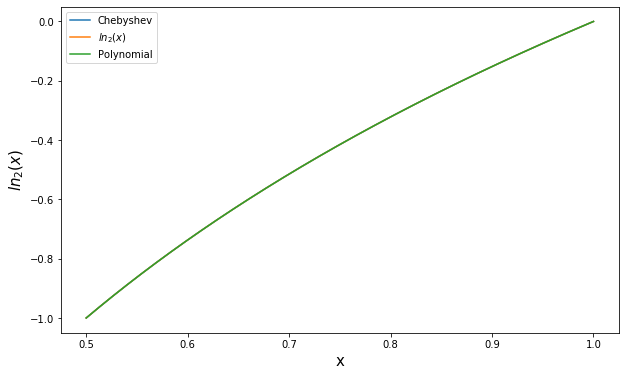

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_ch, y_ch, label='Chebyshev')
plt.plot(x_ch, ln2(x_ch), label=r'$ln_2(x)$')
plt.plot(x_pol, y_pol, label='Polynomial')
plt.ylabel(r'$ln_2(x)$', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.legend()

Both the polynomial and the Chebyshev fit seem to be follow the true function pretty accuratly.
Looking at the residuals:

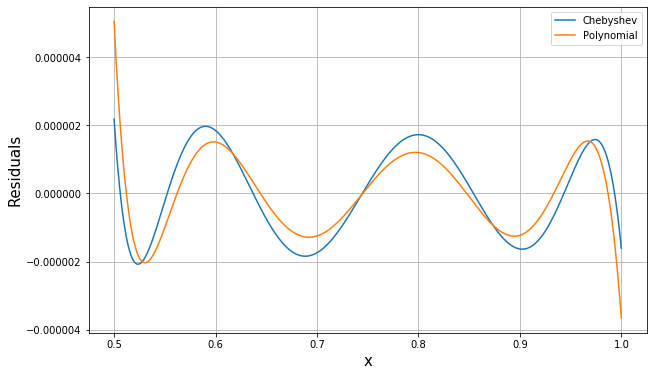

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_ch, res_ch, label='Chebyshev')
plt.plot(x_pol, res_pol, label='Polynomial')
plt.ylabel('Residuals', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.legend()
plt.grid('on')

#### Error Analysis:

In [17]:
def rms(y):
    return np.sqrt(sum(y**2)/(len(y)))

In [18]:
print(f'The RMS error in the Chebishev fit is {rms(res_ch):.7f}; whereas the RMS error in the polynomial fit is {rms(res_pol):.7f}.')
print(f'The maximum error in the Chebishev fit is {max(np.abs(res_ch)):.7f}; whereas the maximum error in the polynomial fit is {max(np.abs(res_pol)):.7f}')

The RMS error in the Chebishev fit is 0.0000013; whereas the RMS error in the polynomial fit is 0.0000011.
The maximum error in the Chebishev fit is 0.0000022; whereas the maximum error in the polynomial fit is 0.0000050


Therefore, the maximum error in the Chebishev fit is smaller than the polynomial fit's, but its RMS error is bigger.

# Question 3:
## a)

In [19]:
#Define the half-times, all in years:
ht_u238 = (4.468e9 *u.yr).to(u.s).value
ht_th234 = (24.1 * 24 * u.h).to(u.s).value
ht_pr234 = (6.7 * u.h).to(u.s).value
ht_u234 = (245500*u.yr).to(u.s).value
ht_tho230 = (75380*u.yr).to(u.s).value
ht_ra226 = (1600*u.yr).to(u.s).value
ht_rad222 = (3.8235 * 24 * u.h).to(u.s).value
ht_pol218 = (3.1 * u.min).to(u.s).value
ht_pb214 = (26.8 * u.min).to(u.s).value
ht_bi214 = (19.9 * u.min).to(u.s).value
ht_pol214 = 164.3e-6
ht_pb210 = (22.3*u.yr).to(u.s).value
ht_bi210 = (5.015*u.yr).to(u.s).value
ht_pol206 = (138376 * 24 * u.h).to(u.yr).value
ht_pb206 = np.inf

In [20]:
#Array of all half-lives:
half_lives = np.array([ht_u238, ht_th234, ht_pr234, ht_u234, ht_tho230, ht_ra226, ht_rad222, ht_pol218,
                      ht_pb214, ht_bi214, ht_pol214, ht_pb210, ht_bi210, ht_pol206, ht_pb206])

#Array of decay constants:
λ = np.log(2)/half_lives

#Array of initial conditions:
n0 = np.zeros(len(λ))
n0[0] = 2000 # pure Uranium238 sample so all initial Ns = 0 except the first

In [21]:
def function(t, n, λ):    
    dndt = np.zeros(len(λ))
    dndt[0] = - n[0] * λ[0]
    
    for i in range(1, len(n)):
        dndt[i] = - n[i] * λ[i] + sum(n[:i]*λ[:i]*np.exp(-λ[:i]*t))
    
    return dndt

In [22]:
decay = integrate.solve_ivp(function, [0,1e18], n0, method='Radau', args=(λ,))

Text(0.5, 1.0, 'Radioactive Decay of U238')

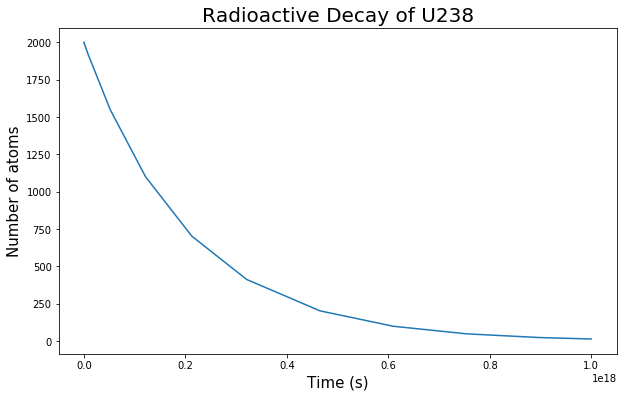

In [23]:
plt.figure(figsize=(10,6))
plt.plot(decay.t, decay.y[0])
plt.ylabel('Number of atoms', fontsize=15)
plt.xlabel('Time (s)', fontsize=15)
plt.title('Radioactive Decay of U238', fontsize=20)

Text(0.5, 1.0, 'Radioactive Decay of Pb206')

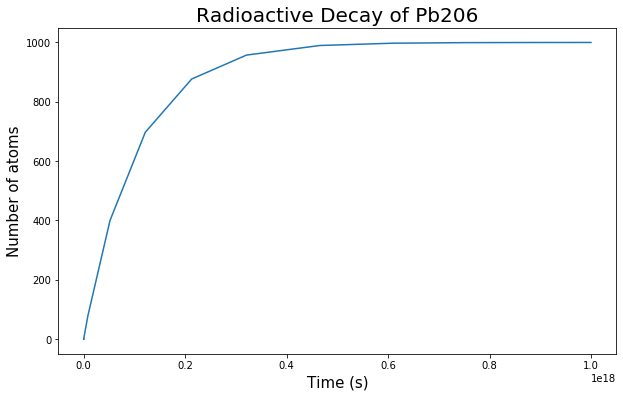

In [24]:
plt.figure(figsize=(10,6))
plt.plot(decay.t, decay.y[-1])
plt.ylabel('Number of atoms', fontsize=15)
plt.xlabel('Time (s)', fontsize=15)
plt.title('Radioactive Decay of Pb206', fontsize=20)

Since this is a stiff equation, and the half-lives of the radioactive products vary greatly, it is not possible to use an Explicit Runge-Kutta methods, as the code would take too long to run.

The solver we use in this case therefore has to be an implicit method. The one used here is the Radau method.

## b)

Text(0.5, 1.0, 'U238/Pb206 Evolution')

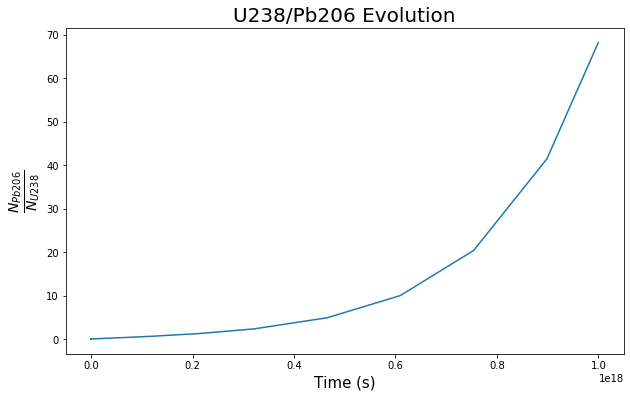

In [25]:
plt.figure(figsize=(10,6))
plt.plot(decay.t, decay.y[-1]/decay.y[0])
plt.ylabel(r'$\frac{N_{Pb206}}{N_{U238}}$', fontsize=20)
plt.xlabel('Time (s)', fontsize=15)
plt.title('U238/Pb206 Evolution', fontsize=20)

If we approximate that the Uranium decays instantaneously to Lead, we can write the formula for Lead as:

$$ \frac{dN_{Pb206}}{dt} = -N_{Pb206}\lambda_{Pb206}$$

And since Pb206 is stable, $\lambda_{Pb206}=0$

$$ N_{Pb206,f} = N_{Pb206}$$

And for the Uranium:

$$\frac{dN_{U238}}{dt} = -N_{U238}\lambda_{U238}$$

$$N_{U238, f} = N_{U238}e^{-\lambda_{U238}t}$$

So:

$$\frac{N_{Pb206,f}}{N_{U238,f}}  = \frac{N_{Pb206}}{N_{U238}e^{-\lambda_{U238}t}}$$

$$  = \frac{N_{Pb206}}{N_{U238}} e^{\lambda_{U238}t}$$

The ratio thus follows an exponential, as we can see on the figure above. 

(-20000000000000.0, 100000000000000.0)

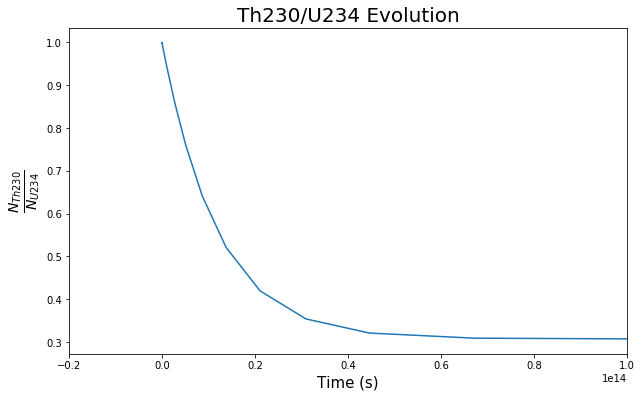

In [26]:
plt.figure(figsize=(10,6))
plt.plot(decay.t[1:], decay.y[4,1:]/decay.y[3,1:])
plt.ylabel(r'$\frac{N_{Th230}}{N_{U234}}$', fontsize=20)
plt.xlabel('Time (s)', fontsize=15)
plt.title('Th230/U234 Evolution', fontsize=20)
plt.xlim(-0.2e14,1e14)